In [1]:
%matplotlib inline
from LRGSG_package.LRGSG import *
#
move_to_rootf(print_tf=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [6]:
l = Lattice3D(dim=(3, 3, 3), pbc=False, with_positions=True, geo='fcc', 
              theta=np.pi/12, phi=np.pi/12)

In [7]:
np.where(np.array([i for i in range(10)]) < 4)[0]

array([0, 1, 2, 3])

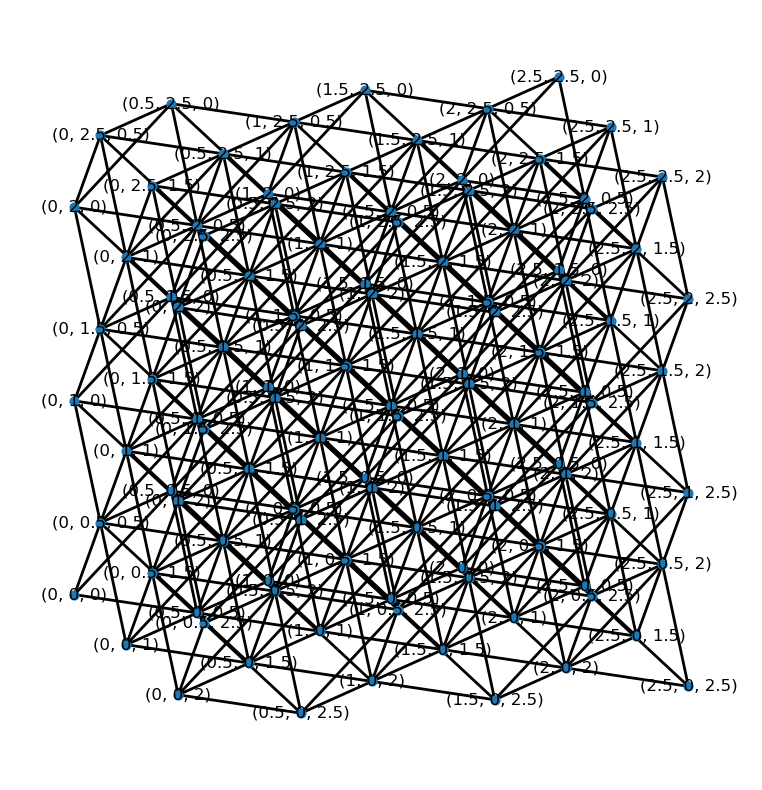

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')
nx.draw(l.G, pos=l.get_node_pos(), width=2, node_size=40, with_labels=True)

In [9]:
dict(l.G.degree()).values()

dict_values([8, 8, 5, 12, 12, 8, 3, 12, 5, 8, 8, 12, 8, 8, 5, 8, 8, 12, 3, 8, 3, 12, 12, 12, 8, 12, 8, 8, 12, 5, 8, 12, 12, 8, 8, 5, 5, 8, 8, 8, 8, 12, 5, 5, 5, 8, 12, 8, 3, 12, 12, 8, 12, 8, 12, 8, 5, 5, 12, 5, 12, 5, 8, 12, 8, 8, 12, 8, 8, 8, 8, 12, 5, 5, 5, 12, 5, 5, 5, 8, 8, 8, 12, 5, 8, 12, 12, 8, 8, 12, 8, 8, 12, 12, 12, 5, 8, 8, 5, 5, 8, 8, 12, 8, 5, 8, 8, 8])

In [12]:
import numpy as np
import networkx as nx
from itertools import product

class LatticeGenerator:
    def __init__(self, dim, pbc=True):
        self.dim = dim
        self.pbc = pbc

    def _wrap_coordinate(self, coord):
        """Wrap coordinates according to PBC and lattice dimensions."""
        return tuple(c % d for c, d in zip(coord, self.dim))

    def _generate_fcc_lattice(self):
        G = nx.Graph()
        
        # Offsets for FCC lattice to include face-centered points
        fcc_offsets = [(0, 0, 0), (0.5, 0.5, 0), (0.5, 0, 0.5), (0, 0.5, 0.5)]

        # Generate all nodes, considering PBC for wrapping
        nodes = set(self._wrap_coordinate((x + ox, y + oy, z + oz))
                    for x, y, z in product(range(self.dim[0]), range(self.dim[1]), range(self.dim[2]))
                    for ox, oy, oz in fcc_offsets)

        G.add_nodes_from(nodes)

        # Pre-calculate wrapped neighbors for each node considering PBC
        node_list = list(G.nodes())
        for nd in node_list:
            for ox, oy, oz in fcc_offsets:
                for dx, dy, dz in [(-0.5, -0.5, 0), (-0.5, 0.5, 0), (0.5, -0.5, 0), (0.5, 0.5, 0),
                                   (-0.5, 0, -0.5), (-0.5, 0, 0.5), (0.5, 0, -0.5), (0.5, 0, 0.5),
                                   (0, -0.5, -0.5), (0, -0.5, 0.5), (0, 0.5, -0.5), (0, 0.5, 0.5)]:
                    # Wrap neighbor coordinates considering PBC
                    neighbor = self._wrap_coordinate((nd[0] + ox + dx, nd[1] + oy + dy, nd[2] + oz + dz))
                    if neighbor in nodes and neighbor != nd:
                        G.add_edge(nd, neighbor)

        return G

# Example usage
dim = (4, 4, 4)  # Specify dimensions of the FCC lattice
lattice_gen = LatticeGenerator(dim)
G = lattice_gen._generate_fcc_lattice()

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 256
Number of edges: 5376


In [15]:
dict(G.degree()).values()

dict_values([42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42,